In [235]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import settings
import pandas as pd
import numpy as np
import operator
import graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeRegressor

def read_data():
    df = pd.read_excel(os.path.join('..',settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

def sort_important_features(df):
    dt = DecisionTreeRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = dt.fit(df[predictors], df[settings.TARGET])
    predictions = dt.predict(df[predictors])
    results = {name: score for name, score in zip(predictors, dt.feature_importances_)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = dt.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    return model

In [236]:
df = read_data()

In [237]:
model = sort_important_features(df)

feature: focuspast, importance: 0.10490970284336333
feature: laughter, importance: 0.10097707168459036
feature: posemo_2h, importance: 0.09162733734831062
feature: interrog, importance: 0.07523057399877149
feature: anx_3q, importance: 0.04617621301130837
feature: male, importance: 0.029849482607770136
feature: informal, importance: 0.029351066188502035
feature: negemo_change_q, importance: 0.028901484351755102
feature: Fairness, importance: 0.02652954521766883
feature: anx_2h, importance: 0.02478488693334699
feature: power, importance: 0.022673232064886133
feature: negemo, importance: 0.021302182227291452
feature: cogproc, importance: 0.020397323528238063
feature: achieve, importance: 0.018608011488292178
feature: WPS, importance: 0.017893129822370936
feature: ppron, importance: 0.015214986441129338
feature: you, importance: 0.015169800581260466
feature: differ, importance: 0.014280242962552075
feature: percept, importance: 0.013044514093300052
feature: anger, importance: 0.01205693110

In [86]:
def print_tree(model):
    predictors = df.columns.tolist()
    features = [p for p in predictors if p not in settings.NON_PREDICTORS]
    data = export_graphviz(model, out_file=None, feature_names=features)
    graph = graphviz.Source(data)
    graph.render(view=True)

In [87]:
print_tree(model)

## Random Forest

In [232]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

def sort_important_features(df):
    rf = RandomForestRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = rf.fit(df[predictors], df[settings.TARGET])
    predictions = rf.predict(df[predictors])
    importances = rf.feature_importances_
    
    results = {name: score for name, score in zip(predictors, importances)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = rf.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    names = [k[0] for k in sorted_results]
    return model, importances, names

def plot_feature_importances(df, importances, names):
    reversed_names = names[::-1]
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    features = predictors
    indices = np.argsort(importances)
    predictors = np.array(predictors)
    
    
    plt.figure(figsize=(30,60))
    matplotlib.rcParams.update({'font.size': 22})
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')

    plt.yticks(range(len(indices)),reversed_names)
    plt.xlabel('Relative Importance')
    plt.show()

In [233]:
rf, importances, names = sort_important_features(df)

feature: interrog, importance: 0.13088233436414087
feature: laughter, importance: 0.10168756739689296
feature: anx_2q, importance: 0.04657136627743636
feature: posemo_change_h, importance: 0.024244309824032258
feature: you, importance: 0.020772307510873087
feature: verb, importance: 0.01993617976347401
feature: power, importance: 0.019268070029469814
feature: negemo_change_q, importance: 0.01887405935996439
feature: achieve, importance: 0.017129311105643114
feature: article, importance: 0.015669577023554416
feature: anx_3q, importance: 0.015570364814344845
feature: feel, importance: 0.015494729902589644
feature: pronoun, importance: 0.015007922767768902
feature: number, importance: 0.012912425200570477
feature: drives, importance: 0.01258353636558876
feature: affect_3q, importance: 0.012271417505422705
feature: discrep, importance: 0.011960659365701709
feature: death, importance: 0.01169922922373733
feature: posemo_2q, importance: 0.011402467733915473
feature: posemo_change_q, importan

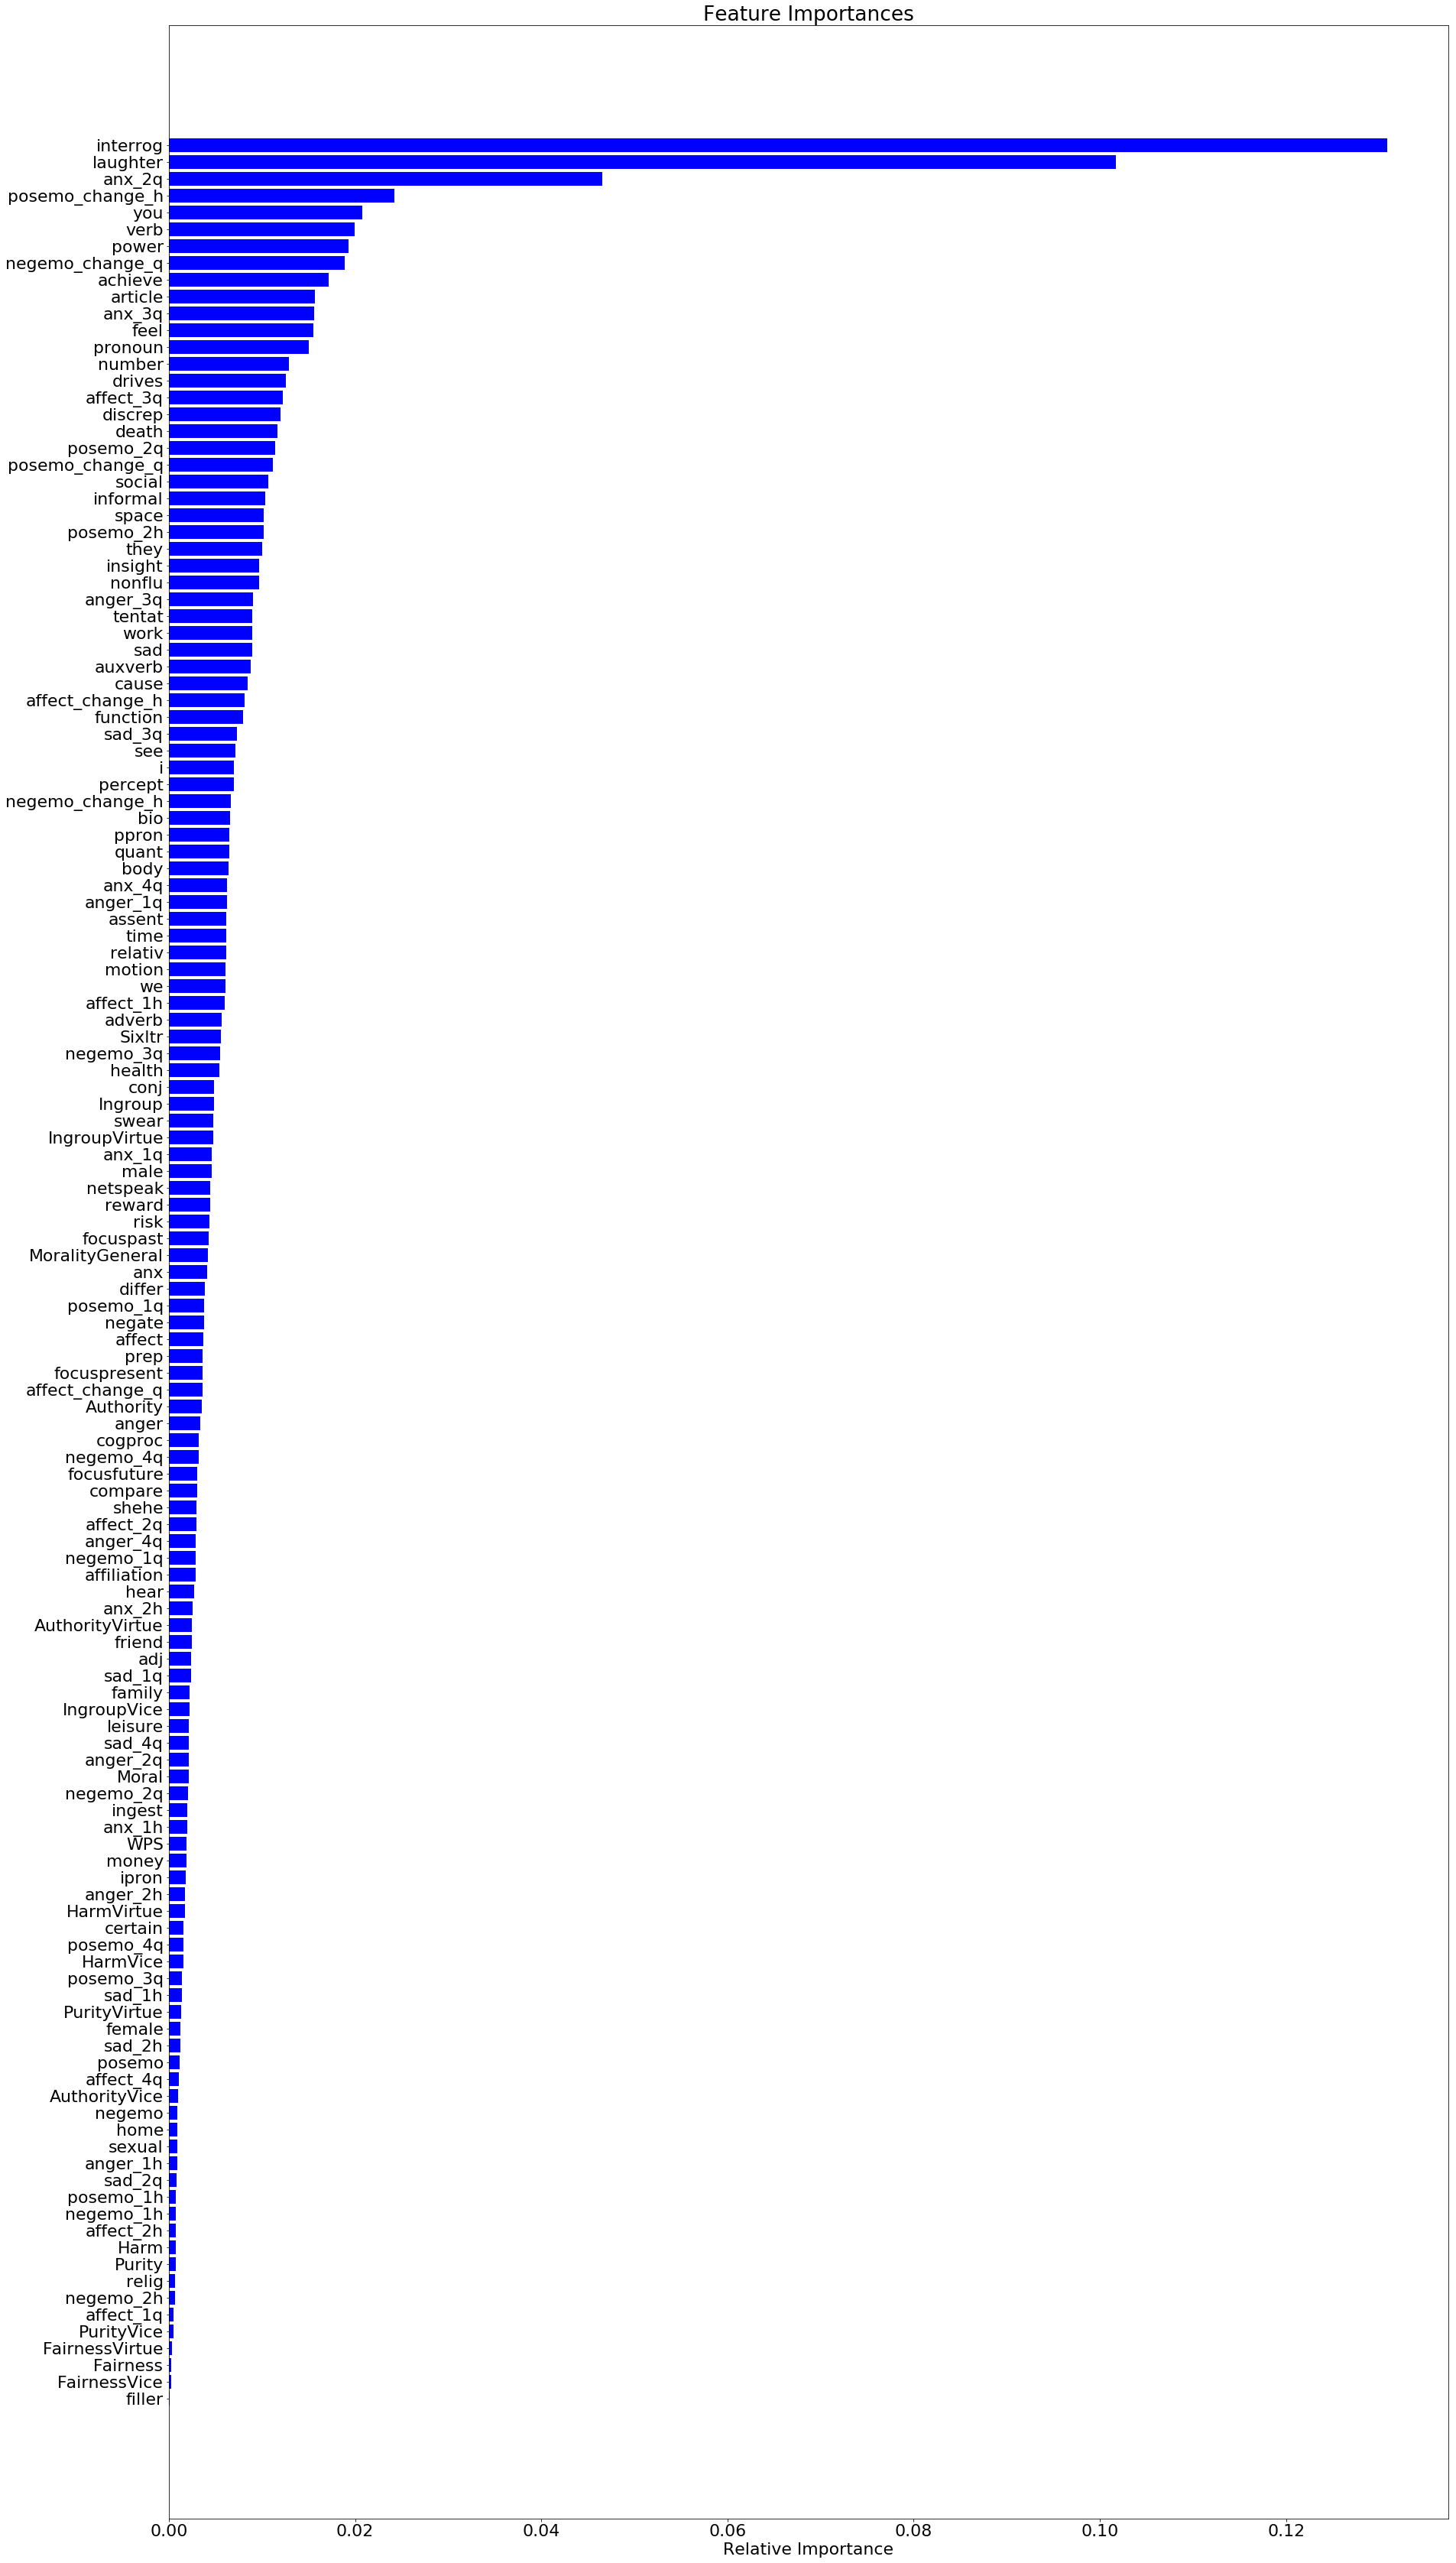

In [234]:
plot_feature_importances(df, importances, names)

## Linear Regression

In [20]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

/Users/owentemple/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [230]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['laughter', 'interrog', 'anx_3q', 'posemo', 'you']
    lr.fit(df[predictors], df['views'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['views'], X2)
    est2 = est.fit()
    print(est2.summary())

In [231]:
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     58.20
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           2.54e-57
Time:                        21:31:57   Log-Likelihood:                -38757.
No. Observations:                2406   AIC:                         7.753e+04
Df Residuals:                    2400   BIC:                         7.756e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.699e+05   2.09e+05     -0.815      0.4